### SNU 2021-1 Introduction to Artificial Intelligence 실습

In [1]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torchvision import datasets
from torchvision import transforms as T
import matplotlib.pyplot as plt

In [2]:
train_dset = datasets.MNIST(root='data', train=True, transform=T.ToTensor(), download=True)
test_dset = datasets.MNIST(root='data', train=False, transform=T.ToTensor(), download=True)

In [3]:
train_loader = torch.utils.data.DataLoader(train_dset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dset, batch_size=64, shuffle=False)

In [11]:
next(iter(train_loader))[1].shape

torch.Size([64])

In [18]:
def train(model, train_loader, optimizer, device):
    for i, (image, target) in enumerate(train_loader):
        image = image.to(device)
        output = model(image)
        loss = F.cross_entropy(output, target)

        model.zero_grad()
        loss.backward()
        optimizer.step()

        if i%200 == 0:
            loss_value = loss.detach().numpy()
            loss_values.append(loss_value) # np.ndarray
            #print(f'iter {i}: {loss_value}')


In [7]:
def test(model, test_loader, device):
    accurate = 0
    with torch.no_grad():
        for i, (image, target) in enumerate(test_loader):
            image = image.to(device)
            output = model(image)

            prediction = torch.argmax(output, dim=1)

            for p,t in zip(prediction, target):
                if p == t:
                    accurate += 1
    accuracy = accurate / len(test_loader.dataset)

    return accuracy

In [8]:
# MLP
class MLP(nn.Module):
    def __init__(self):
        super(net, self).__init__()

        self.fc = nn.Sequential(
            nn.Linear(28*28, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.Softmax(dim=1)
        )
    
    def forward(self, x):
        x = x.view(-1, 28*28) # batch_size, neurons of input layer
        return self.fc(x)

In [37]:
# CNN
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 32, 4, stride=2, padding=1), # B * 32 * 14 *14
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Conv2d(32, 32, 4, stride=2, padding=1),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, stride=1, padding=1),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Conv2d(32, 32, 3, stride=2, padding=1),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.Conv2d(32, 32, 4, stride=2, padding=1),
            nn.Dropout(0.2),
            nn.ReLU(),
            nn.AvgPool2d(2) # B * 32 * 1 * 1
        )

        self.fc = nn.Sequential(
            nn.Linear(32, 10),
            nn.Softmax()
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(-1, 32)
        x = self.fc(x)
        return x

In [38]:
# train CNN
cnn = CNN()
optimizer = torch.optim.Adam(cnn.parameters(), lr=1e-4)
#optimizer = torch.optim.Adam(cnn.parameters(), lr=1e-4, weight_decay=1e-5)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

loss_values = []
for i_epoch in range(3):
    print(f'epoch {i_epoch}')
    train(cnn, train_loader, optimizer, device)

#test(cnn, test_loader, device)

epoch 0
/home/yejoon/anaconda3/envs/pytorch-env/lib/python3.6/site-packages/torch/nn/modules/container.py:92: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
epoch 1
epoch 2


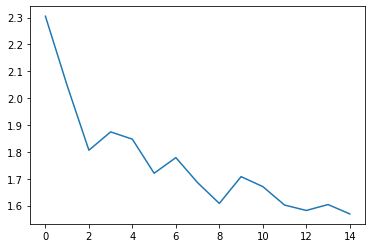

In [39]:
# plot
plt.plot(loss_values)

In [40]:
# test cnn
# Accuracy:
# Plain CNN: 0.7587
# With L1 Regularization: 0.8292
# With BatchNorm: 0.9874
# With Dropout(p=0.2): 0.8856

test(cnn, test_loader, device) 

0.8856